<a href="https://colab.research.google.com/github/mcgmed/Tensorflow/blob/main/Using-Tensorflow-to-Create-Text/Irish_Song_Extending_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2022-11-30 19:04:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-11-30 19:04:57 (117 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

word_index = tokenizer.word_index
print(f'Instances from word index: {list(word_index.items())[:6]}')
print(f'Total word number is: {total_words}')

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Instances from word index: [('the', 1), ('and', 2), ('i', 3), ('to', 4), ('a', 5), ('of', 6)]
Total word number is: 2690


In [5]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10)

Epoch 1/10
377/377 [==============================] - 17s 25ms/step - loss: 6.8810 - accuracy: 0.0643
Epoch 2/10
377/377 [==============================] - 10s 25ms/step - loss: 6.4083 - accuracy: 0.0657
Epoch 3/10
377/377 [==============================] - 14s 37ms/step - loss: 6.2939 - accuracy: 0.0656
Epoch 4/10
377/377 [==============================] - 11s 28ms/step - loss: 6.2120 - accuracy: 0.0675
Epoch 5/10
377/377 [==============================] - 11s 30ms/step - loss: 6.1304 - accuracy: 0.0676
Epoch 6/10
377/377 [==============================] - 9s 24ms/step - loss: 6.0598 - accuracy: 0.0709
Epoch 7/10
377/377 [==============================] - 17s 46ms/step - loss: 6.0065 - accuracy: 0.0743
Epoch 8/10
377/377 [==============================] - 12s 33ms/step - loss: 5.9561 - accuracy: 0.0776
Epoch 9/10
377/377 [==============================] - 9s 24ms/step - loss: 5.9181 - accuracy: 0.0812
Epoch 10/10
377/377 [==============================] - 9s 24ms/step - loss: 5.8671 -

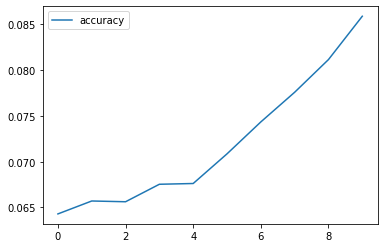

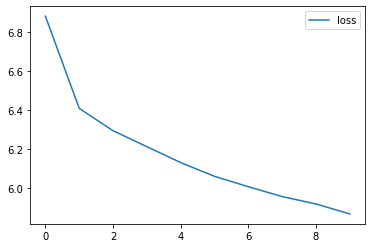

In [6]:
def plot_graphs(history, string):
  plt.plot(history.history[string]);
  plt.legend([string]);
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [8]:
seed_text = "sweet jeremy saw dublin"

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
pred_classes=model.predict(token_list)
print(pred_classes.reshape(-1)[predicted])
print(predicted)
for word, index in tokenizer.word_index.items():
	if index == predicted:
		print(word)
		break

1/1 [==============================] - 0s 23ms/step
[0.01180176]
[22]
love


In [7]:
seed_text = "sweet jeremy saw dublin"
next_words=10

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 25ms/step
sweet jeremy saw dublin love and the heart of the heart of the heart
